# Sentiment Analysis using LSTM and GloVe Embeddings.

The model uses 50K movie reviews labelled as 'positive' and 'negative' that implements a Sentiment Analysis model using LSTM and GloVe(Global Vectors) Word Embeddings.

There is 100-dimmensional GloVe(Global Vectors) word Embeddings is used. It is an unsupervised learning algorithm used for the similar representation of words having same meanings.
LSTM(Long Short-term Memory) is a type of RNN model used for handling long sequence dependencies for classification task.

In [1]:
import re                                   # 're' Replication of text.
import numpy as np                          
import pandas as pd                         # 'pandas' to manipulate the dataset.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns                       # 'seaborn' to visualize the dataset.
import tensorflow as tf
from tensorflow.keras.models import Sequential                # 'Sequential' model will be used for training.
from sklearn.model_selection import train_test_split          # 'train_test_split' for splitting the data into train and test data. 
from tensorflow.keras.preprocessing.text import Tokenizer       
from tensorflow.keras.preprocessing.sequence import pad_sequences       # 'pad_sequences' for having same dimmension for each sequence.
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense     # import some layers for training.

Load Dataset and check if there is any NaN or Null values.
Also check the shape of the dataset.

In [2]:
movie_reviews = pd.read_csv(r"D:\Computer Science\Machine Learning\Dacuments\My Datasets\Sentiment Analysis\IMDB Dataset.csv", encoding = 'latin1')

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

Show first five rows of the data using head() method.

In [3]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Plot the labels using barchart to check the label types and their counts.

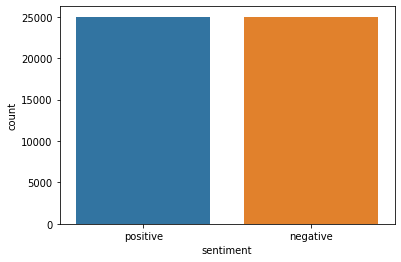

In [4]:
sns.countplot(x = 'sentiment' , data = movie_reviews)

## Data Preprocessing Stage.
Defining functions to eliminate HTML tags, punctuations, extra characters and multiple spaces from the given text in dataset.

In [5]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [6]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

Data preprocessing using data cleaning functions defined above.

In [7]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

Check whether the data is cleansed.

In [8]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

Preparing labels and converting them from string labels to '0' and '1' form for training purpose.

In [9]:
y = list(movie_reviews['sentiment'])

y = np.array(list(map(lambda x : 1 if x == 'positive' else 0, y)))

Splitting dataset into train data and test data. 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

## Preparing the text for feeding into algorithm.
Defining vocabullary and coverting text/sentences into sequences.

In [11]:
tokenizer = Tokenizer(num_words = 5000)

tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Padding all sequences to have same dimmensions throughout and maintain homogenity between them for training purpose. 

In [12]:
vocab_size = len(tokenizer.word_index) + 1

max_len = 100

X_train = pad_sequences(X_train, padding = 'post', maxlen = max_len)
X_test = pad_sequences(X_test , padding = 'post', maxlen = max_len)

## Preparing GloVe Embeddings to use them in training the model.

In [13]:
embeddings_dictionary = dict()
glove_file = open('D:\Computer Science\Machine Learning\Dacuments\My Datasets\GloVe/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [14]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## Define Layers and Compile.
Define Embedding layer using GloVe weights and an LSTM layers with 128 neurons and at the last Dense layer with final neuron with 'sigmoid' activation.           
Finally compile the model having 'binary_crossentropy' as a loss function, 'adam' as an optimizer with 'accuracy' as a metric.

In [15]:
model = Sequential([
    Embedding(vocab_size, 100,  weights=[embedding_matrix], input_length=max_len, trainable=False),
    LSTM(128),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Fit the model with '6' epochs having batch size of '128' reviews and '20%' of validation data. 

In [16]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 6, validation_split = 0.20, verbose = 1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 135s 4ms/sample - loss: 0.5639 - acc: 0.7056 - val_loss: 0.4834 - val_acc: 0.7711
Epoch 2/6
32000/32000 [==============================] - 135s 4ms/sample - loss: 0.4448 - acc: 0.7921 - val_loss: 0.4055 - val_acc: 0.8206
Epoch 3/6
32000/32000 [==============================] - 134s 4ms/sample - loss: 0.3919 - acc: 0.8223 - val_loss: 0.3722 - val_acc: 0.8365
Epoch 4/6
32000/32000 [==============================] - 134s 4ms/sample - loss: 0.3610 - acc: 0.8402 - val_loss: 0.3553 - val_acc: 0.8472
Epoch 5/6
32000/32000 [==============================] - 135s 4ms/sample - loss: 0.3411 - acc: 0.8488 - val_loss: 0.3500 - val_acc: 0.8456
Epoch 6/6
32000/32000 [==============================] - 137s 4ms/sample - loss: 0.3258 - acc: 0.8566 - val_loss: 0.3353 - val_acc: 0.8543


For evaluation of our model, we use test data.

In [17]:
score = model.evaluate(X_test, Y_test, verbose = 1)

10000/10000 [==============================] - 22s 2ms/sample - loss: 0.3372 - acc: 0.84941s - 


In [18]:
model.save("Model1.2")

## Model Performance Visualization using Matplotlib.

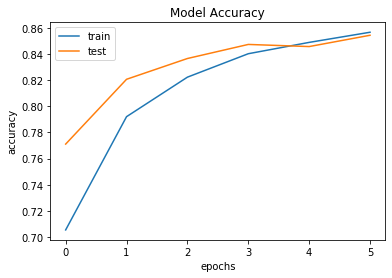

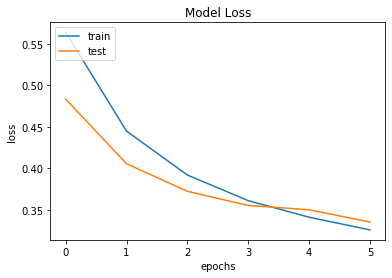

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

## Prediction Stage.
Predict a movie review to cross check whether our model is predicting accurately and precisely according to its performance. 

In [30]:
instance = "A good insight on the hopeless state of Russian modern society. Integrity and good can be found only in interpersonal relations, not in social institutions which are totally corrupted. The movie is a little bit slow, but still catching."

instance = tokenizer.texts_to_sequences(instance)

flat_list = []

for sublist in instance :
    for item in sublist :
        flat_list.append(item)
        
flat_list = [flat_list]

flat_list = pad_sequences(flat_list, padding = 'post', maxlen = max_len)

if model.predict(flat_list) > 0.5 :
    
    print("It\'s a Positive Review. I'm glad having positive review from you.")
    
else :
    print("Oops!! it\'s a Negative Review.")

It's a Positive Review. I'm glad having positive review from you.


## Conclusion :
Our model is getting nice accuracy on training and validation dataset.              
Our model is working good on totally unseen test data.                    
Our model is predicting good on an unseen movie review as well.         